# 카카오톡 메시지 전송방법
#### 나에게 메시지 보내는 방법에 대한 작성임 (차후 개인 메시지 전송 방법에 대한 코드 구현 예정)

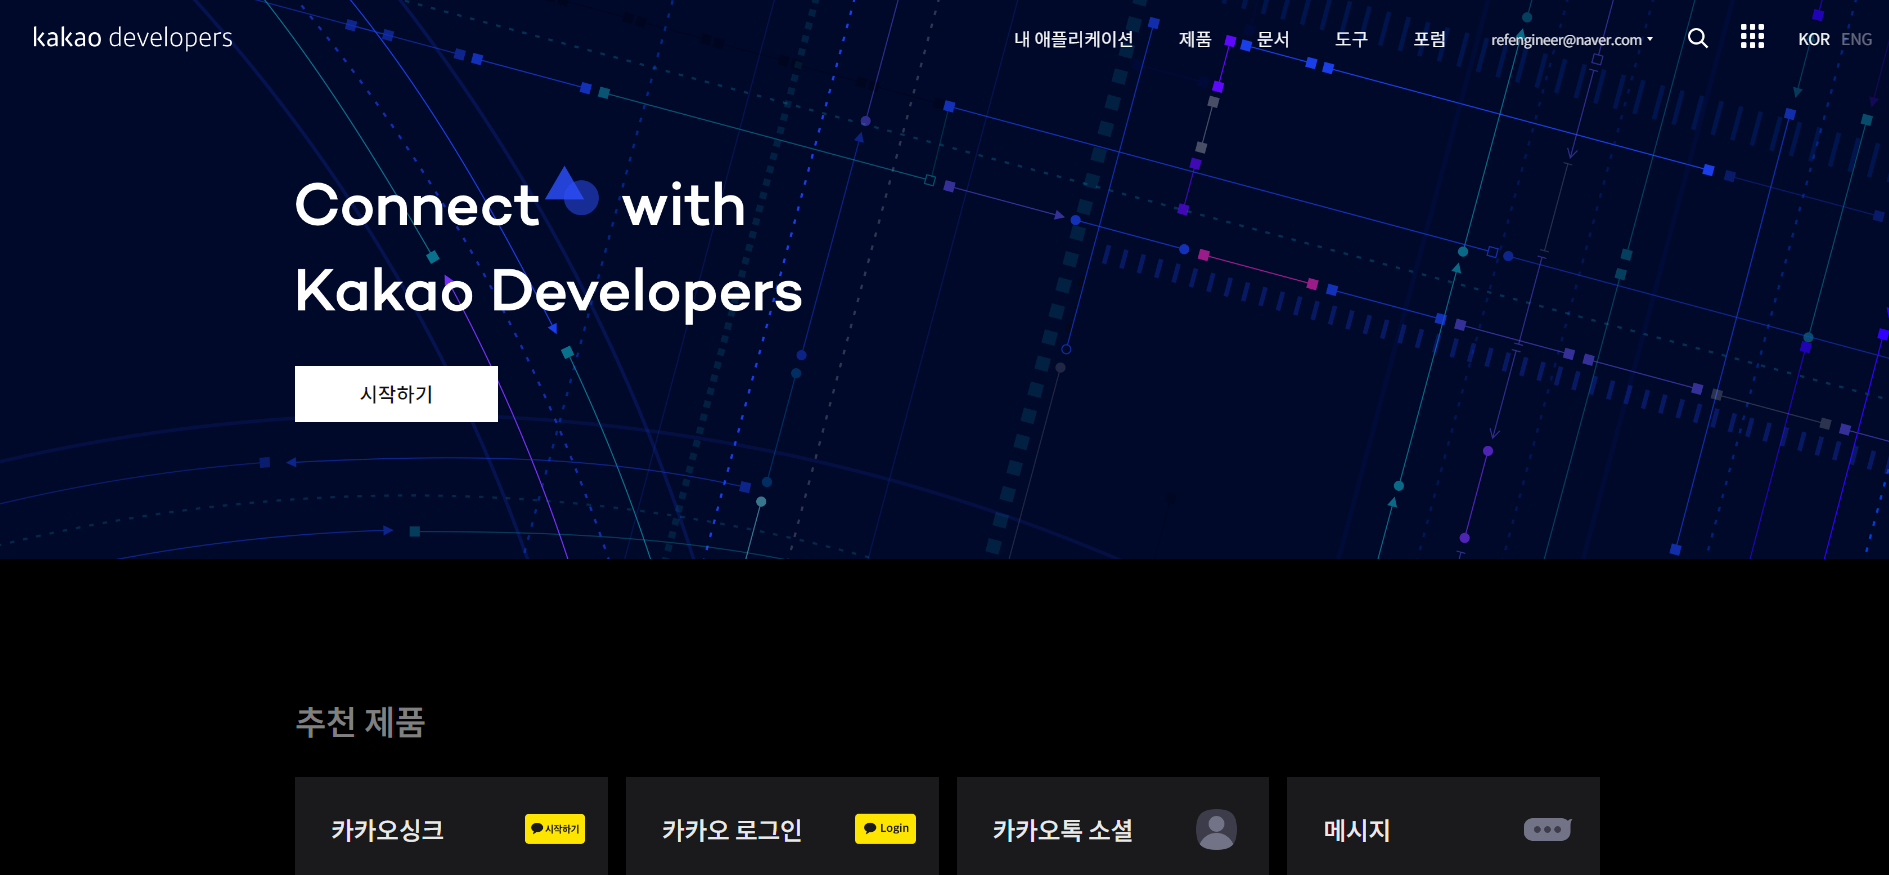
https://developers.kakao.com/

하이퍼링크 클릭 후 로그인 -> 내 애플리케이션 클릭

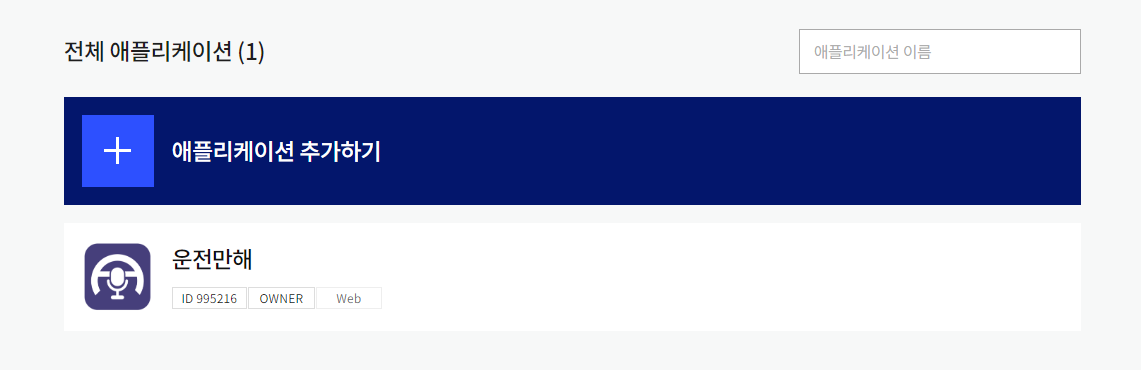
자신이 제작할 애플리케이션 추가하기

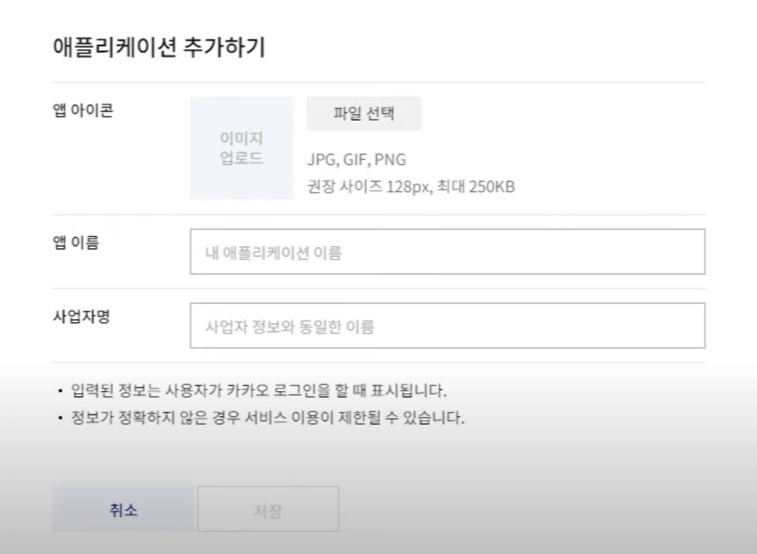

앱 이름: 운전만해  
사업자명 : 자신의 이름

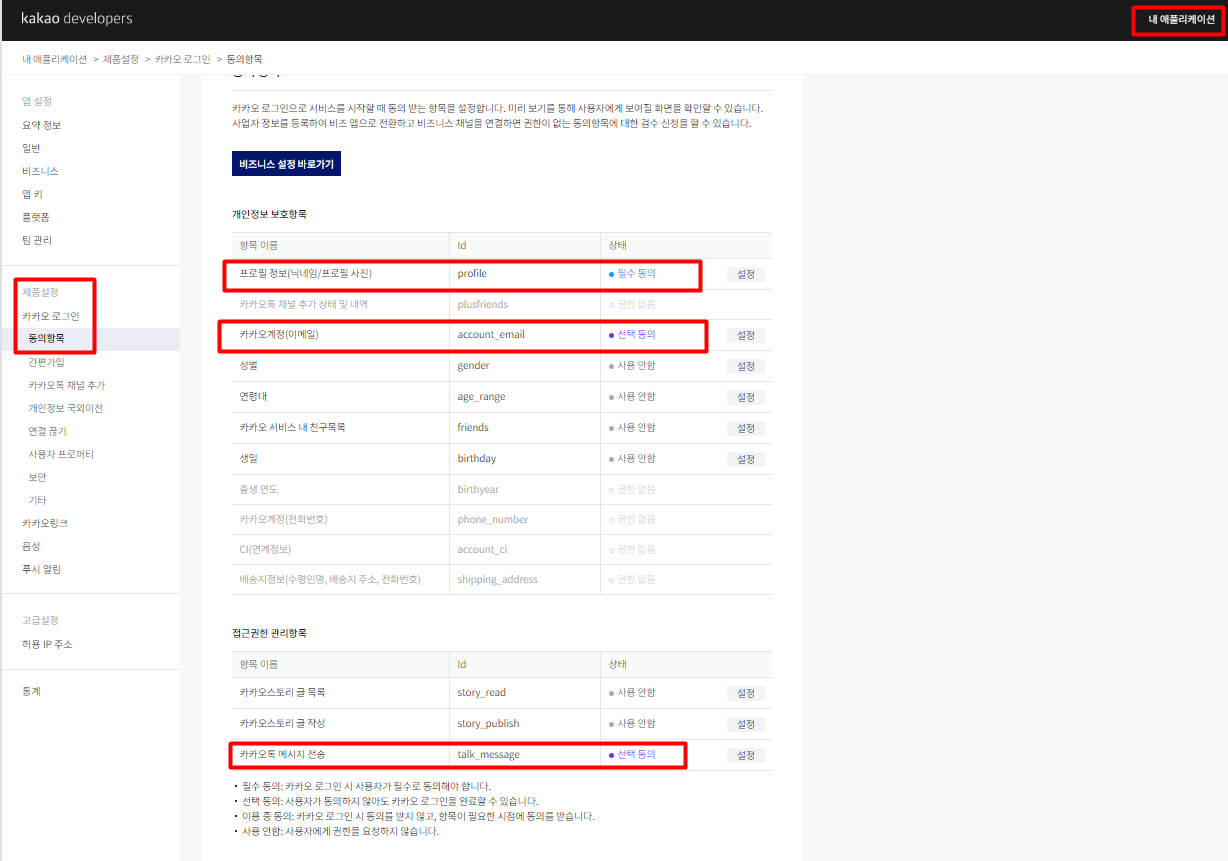

프로필 정보의 닉네임 **필수 동의** 체크 후 -> 사유: '**사용자 확인**' 작성  
프로필 정보의 프로필 사진 **필수 동의** 체크 후 -> 사유: '**사용자 확인**' 작성  
카카오톡 메시지 전송 **선택 동의** 체크 후 -> 사유: '**알림**'작성

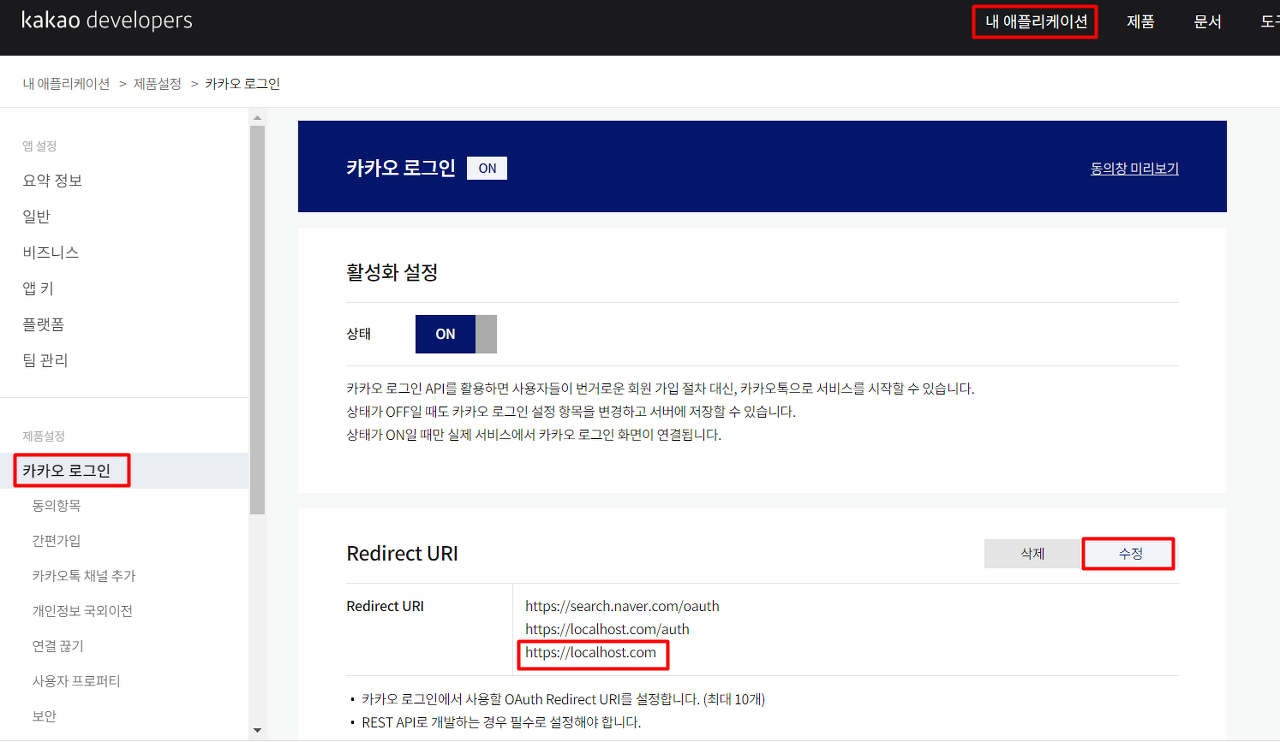
제품설정란의 카카오 로그인 클릭 후 **활성화 상태 ON**  
Redirect URL에서 **https://localhost.com** 추가하기

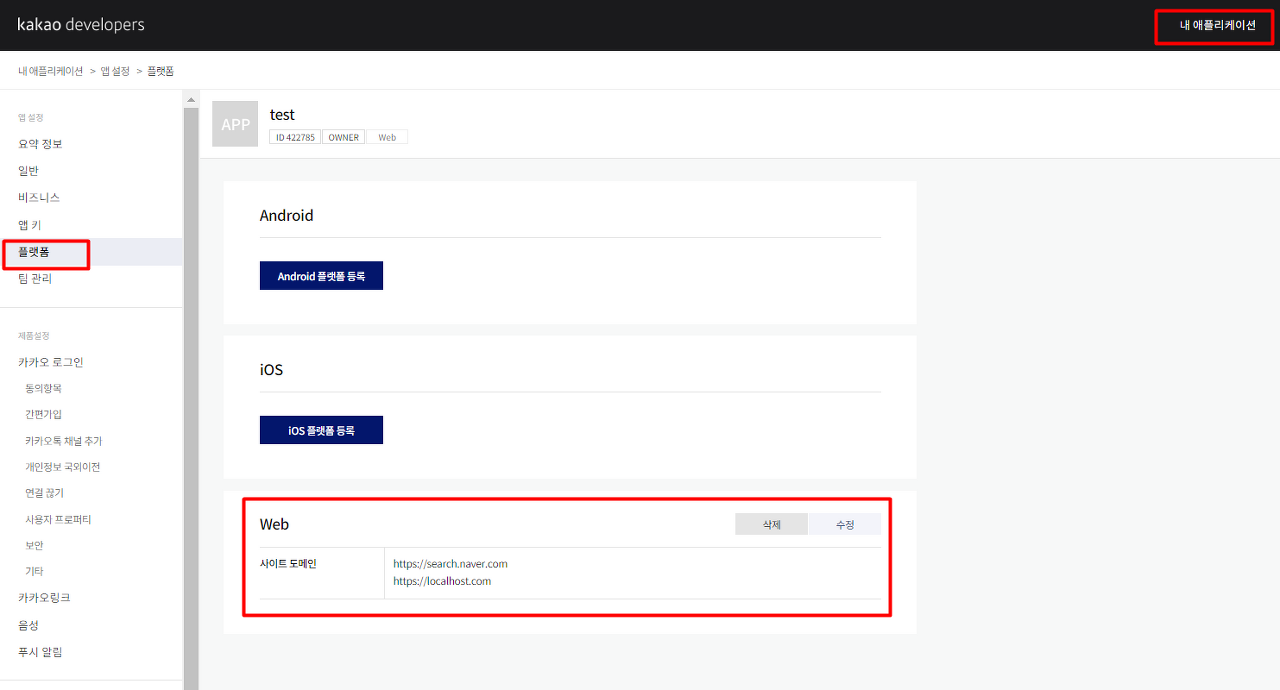
**순서 중요**
플랫폼 클릭 후 web에서  
사이트 도메인 주소 작성  
**https://search.naver.com  
https://localhost.com**

### 인증 code 받아오기

https://kauth.kakao.com/oauth/authorize?client_id={REST_API 앱키를 입력하세요}&response_type=code&redirect_uri=https://localhost.com

REST API를 받아온다.

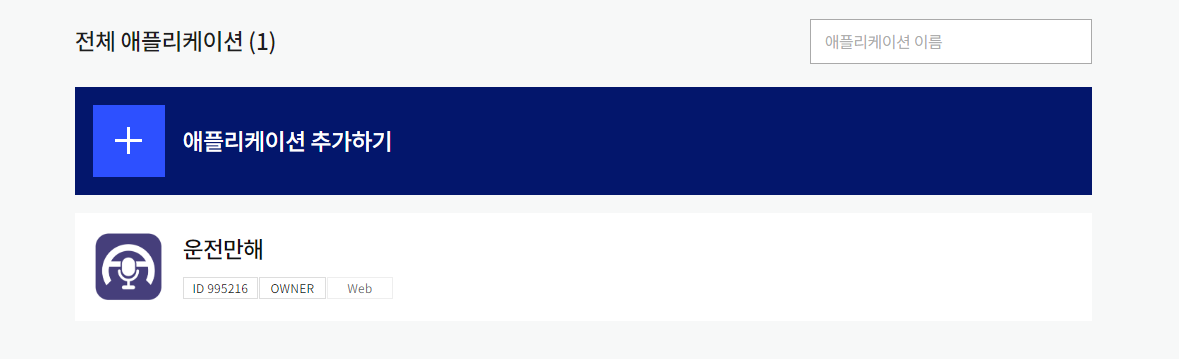

애플리케이션 클릭 후  

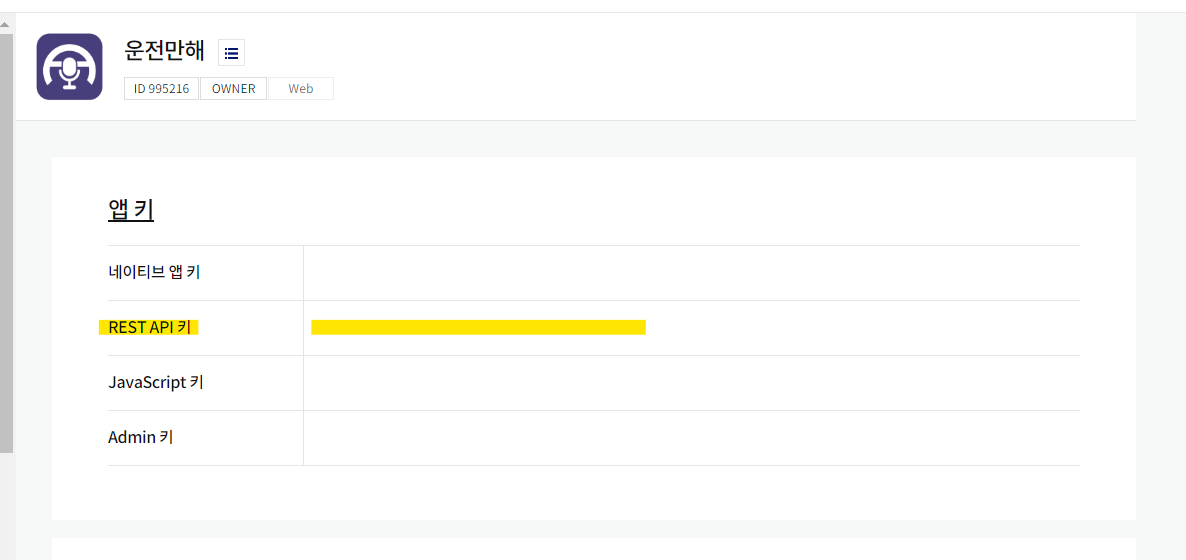

REST API를 받아온다. (이 때, {}(대괄호는 제거해서) 복사 및 붙어넣기 실행)

시크릿 모드창에서 rest api와 함께 주소를 입력한다. **반드시 시크릿 모드에서 실행하기**

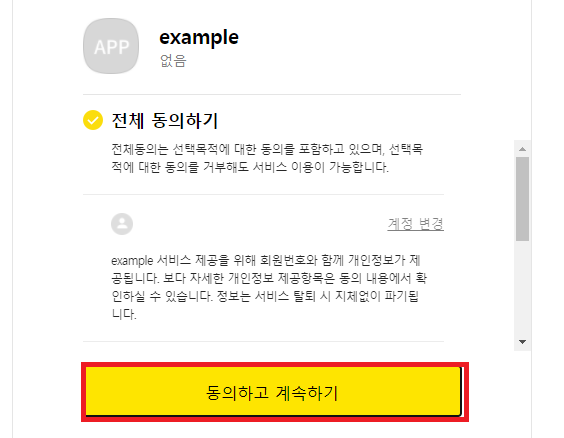

동의하고 계속하기 클릭  
한번 동의하면 다음부터는 안나옴

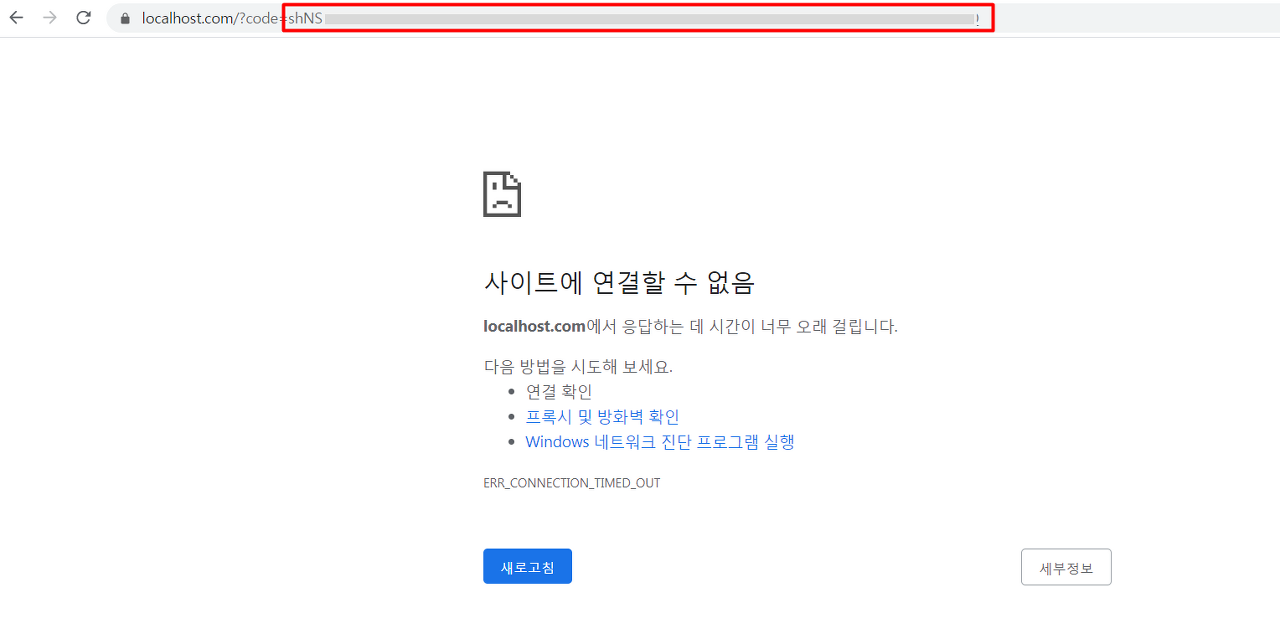

주소 창에서 code 번호를 받아온다.

### 사용자 토큰 받기 (access token, refresh token)

In [ ]:
import requests
import json

url = "https://kauth.kakao.com/oauth/token"

data = {
    "grant_type" : "authorization_code",
    "client_id" : "<REST_API 앱키를 입력하세요>", # REST API 키 입력
    "redirect_uri" : "https://localhost.com",
    "code"         : "<발급받은 code를 입력하세요>" # CODE 입력
    
}
response = requests.post(url, data=data)

tokens = response.json()

print(tokens)

access token을 복사해둔다.

### 메시지 전송하기(텍스트형)

In [3]:
import json
import requests

url = "https://kapi.kakao.com/v2/api/talk/memo/default/send"

# 사용자 토큰
headers = {
    "Authorization": "Bearer " + <access token> # 받은 사용자 토큰 입력하기(access token)
}


data = {
    "template_object" : json.dumps({ "object_type" : "text",
                                     "text" : "Hello, world!",
                                     "link" : {
                                                 "web_url" : "www.naver.com"
                                              }
    })
}

response = requests.post(url, headers=headers, data=data)
print(response.status_code)
if response.json().get('result_code') == 0:
    print('메시지를 성공적으로 보냈습니다.')
else:
    print('메시지를 성공적으로 보내지 못했습니다. 오류메시지 : ' + str(response.json()))

ConnectionError: HTTPSConnectionPool(host='kapi.kakao.com', port=443): Max retries exceeded with url: /v2/api/talk/memo/default/send (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002182FF6A890>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

### 메시지 전송하기(텍스트형)

In [1]:
import json
import requests

url = "https://kapi.kakao.com/v2/api/talk/memo/default/send"

# 사용자 토큰
headers = {
    "Authorization": "Bearer " +  <access token> # 받은 사용자 토큰 입력하기(access token)
}

template = {
    "object_type" : "list",
    "header_title" : "초밥 사진",
    "header_link" : {
        "web_url" : "www.naver.com",
        "mobile_web_url" : "www.naver.com"
    },
    "contents" : [
        {
            "title" : "1. 광어초밥",
            "description" : "광어는 맛있다",
            "image_url" : "https://search1.kakaocdn.net/argon/0x200_85_hr/8x5qcdbcQwi",
            "image_width" : 50, "image_height" : 50,
            "link" : {
                "web_url" : "www.naver.com",
                "mobile_web_url" : "www.naver.com"
            }
        },
        {
            "title" : "2. 참치초밥",
            "description" : "참치는 맛있다",
            "image_url" : "https://search2.kakaocdn.net/argon/0x200_85_hr/IjIToH1S7J1",
            "image_width" : 50, "image_height" : 50,
            "link" : {
                "web_url" : "www.naver.com",
                "mobile_web_url" : "www.naver.com"
            }
        }
        
    ],
    "buttons" : [
        {
            "title" : "웹으로 이동",
            "link" : {
                "web_url" : "www.naver.com",
                "mobile_web_url" : "www.naver.com"
            }
        }
    ]
    
}

data = {
    "template_object" : json.dumps(template)
}

res = requests.post(url, data=data, headers=headers)
print(response.status_code)
if response.json().get('result_code') == 0:
    print('메시지를 성공적으로 보냈습니다.')
else:
    print('메시지를 성공적으로 보내지 못했습니다. 오류메시지 : ' + str(response.json()))

NameError: name 'response' is not defined

참고한 블로그  
https://ai-creator.tistory.com/23?category=759438  
https://ai-creator.tistory.com/23?category=759438